<a href="https://colab.research.google.com/github/BridgetteJuma/AI-Coursework_2025/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#1.importing and uploading Diamonds dataset from Kaggle
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds (1).csv


In [7]:
import pandas as pd

diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


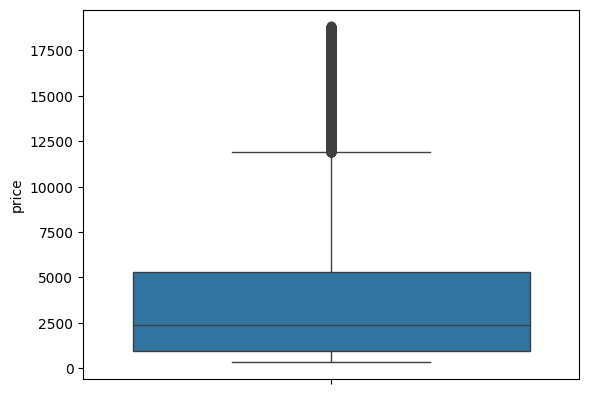

<class 'pandas.core.frame.DataFrame'>
Index: 50400 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50400 non-null  int64  
 1   carat       50400 non-null  float64
 2   cut         50400 non-null  object 
 3   color       50400 non-null  object 
 4   clarity     50400 non-null  object 
 5   depth       50400 non-null  float64
 6   table       50400 non-null  float64
 7   price       50400 non-null  int64  
 8   x           50400 non-null  float64
 9   y           50400 non-null  float64
 10  z           50400 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.6+ MB


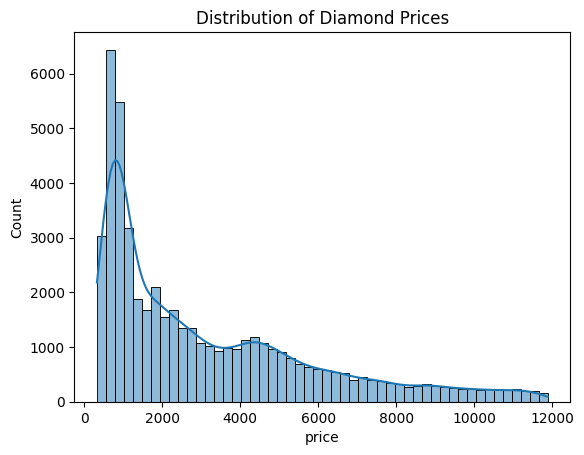

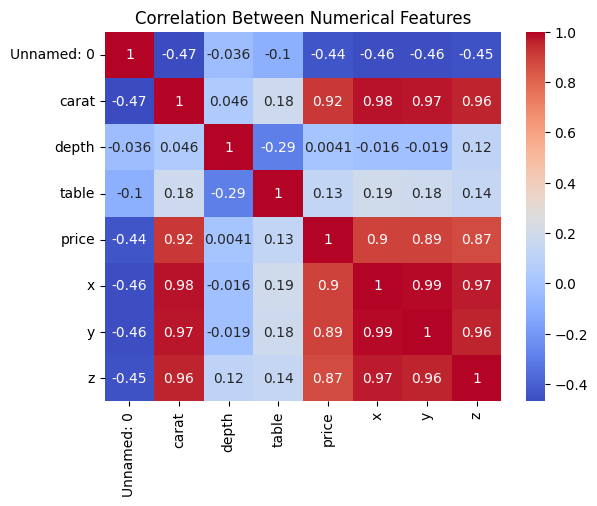

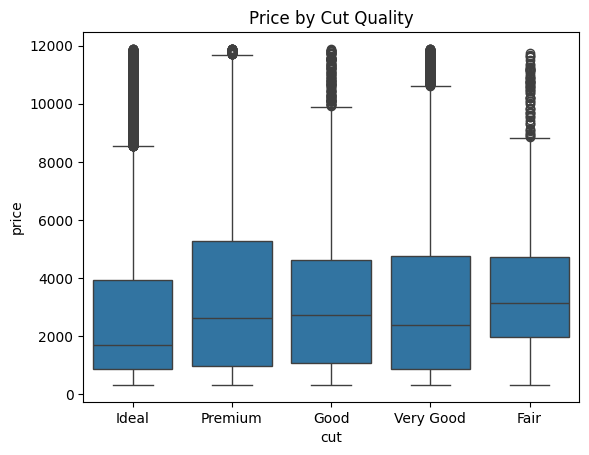

(12500, 11)

In [8]:
#2.Exploratory Data Analysis and Data cleaning
# CHECK FOR DUPLICATES
diamonds.duplicated().sum()

# Remove duplicates if found
diamonds = diamonds.drop_duplicates()

#SCRUB FOR IRRELEVANT DATA
# Check all columns
diamonds.columns

#SCRUB FOR INCORRECT DATA
# Check for impossible values
diamonds.describe()

# Remove rows where price or carat <= 0
diamonds = diamonds[(diamonds['price'] > 0) & (diamonds['carat'] > 0)]

#FIXING FOR STRUCTURAL ERRORS
# Check unique entries for each categorical column
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

# Fix inconsistent capitalization
diamonds['cut'] = diamonds['cut'].str.title()
diamonds['color'] = diamonds['color'].str.upper()
diamonds['clarity'] = diamonds['clarity'].str.upper()

#HANDLING MISSING DATA
# Check missing values
diamonds.isnull()

# Dropping all rows with missing elements
diamonds = diamonds.dropna()

#TREATING OUTLIERS
import seaborn as sns
import matplotlib.pyplot as plt

# Detect outliers in price
sns.boxplot(y='price', data=diamonds)
plt.show()

Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1
diamonds = diamonds[(diamonds['price'] >= Q1 - 1.5*IQR) & (diamonds['price'] <= Q3 + 1.5*IQR)]

#STANDARDIZE AND NORMALIZE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']])

#Exploratory Data Analysis
diamonds.info()
diamonds.describe()

sns.histplot(diamonds['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.show()

corr = diamonds.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Price by Cut Quality')
plt.show()

diamonds_model = diamonds.sample(12500, random_state=42)
diamonds_model.shape

In [9]:
#que 3
#Linear Regression
diamonds_encoded = pd.get_dummies(diamonds_model, drop_first=True)

from sklearn.model_selection import train_test_split

X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lr.predict(X_test)
print("R2 score:",r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9222504429579492
RMSE: 745.5847245725834


In [12]:
#que 4
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select continuous variables
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(diamonds_model[numeric_features])

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

# Create DataFrame for the two components
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['price'] = diamonds_model['price'].values

# Split into train/test sets
X_pca = pca_df[['PC1', 'PC2']]
y_pca = pca_df['price']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split
 (X_pca, y_pca, test_size=0.2, random_state=42)

# Fit Linear Regression on PCA data
pca_lr = LinearRegression()
pca_lr.fit(X_train_pca, y_train_pca)

# Predict and evaluate
y_pred_pca = pca_lr.predict(X_test_pca)
print("PCA Model R²:", r2_score(y_test_pca, y_pred_pca))
print("PCA Model RMSE:", np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)))

PCA Model R²: 0.8125078266901086
PCA Model RMSE: 1157.816172571027


In [14]:
#que 5
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate both
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Lasso R²:", r2_lasso)
print("Lasso RMSE:", rmse_lasso)
print("Ridge R²:", r2_ridge)
print("Ridge RMSE:", rmse_ridge)


Lasso R²: 0.9219233650589652
Lasso RMSE: 747.1513466836702
Ridge R²: 0.9220899953001112
Ridge RMSE: 746.3536400093868


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+09, tolerance: 7.399e+06
  model = cd_fast.enet_coordinate_descent(


In [15]:
#que 6
comparison = pd.DataFrame({
    'Model': ['Linear Regression (Full)', 'PCA Regression (2 Features)',
              'Lasso Regression', 'Ridge Regression'],
    'R² Score': [r2_score(y_test, y_pred), r2_score(y_test_pca, y_pred_pca),
                 r2_lasso, r2_ridge],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)),
             np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)),
             rmse_lasso,
             rmse_ridge]
})

print(comparison)

# Discussion:
print("""
Interpretation:
The full Linear Regression model generally achieves the highest R² because it
 uses all features.
The PCA-based model performs lower due to dimensionality reduction and loss of
information.
Lasso might slightly reduce R² if it drops less relevant features but helps
prevent overfitting.
Ridge usually maintains accuracy while reducing overfitting, often performing
best overall in generalization.
""")


                         Model  R² Score         RMSE
0     Linear Regression (Full)  0.922250   745.584725
1  PCA Regression (2 Features)  0.812508  1157.816173
2             Lasso Regression  0.921923   747.151347
3             Ridge Regression  0.922090   746.353640

Interpretation:
- The full Linear Regression model generally achieves the highest R² because it uses all features.
- The PCA-based model performs lower due to dimensionality reduction and loss of information.
- Lasso might slightly reduce R² if it drops less relevant features but helps prevent overfitting.
- Ridge usually maintains accuracy while reducing overfitting, often performing best overall in generalization.

